In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [23]:
from houghLines import HoughLines, show_lines
from grade import slope_close_to, merge_lines

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

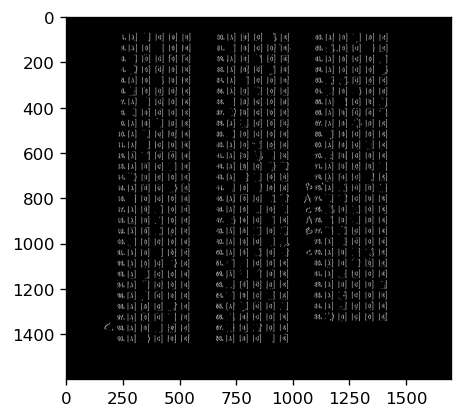

In [17]:
im = cv2.imread('../test-images/a-30.jpg')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5,5), 0)[600:,:]
(T, threshinv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)

sobel_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]).T
pf = cv2.filter2D(src=threshinv, ddepth=-1, kernel=sobel_kernel)

plt.imshow(pf, cmap='gray')

In [39]:
lines, acc_grid, thetas, rhos = HoughLines(threshinv, 1/4, np.pi/(4*180), 200)

diag 2335.0


In [45]:
rho_idxs, theta_idxs = np.nonzero(acc_grid>350)
lines = list(zip(rhos[rho_idxs], thetas[theta_idxs]))
len(lines)

1746

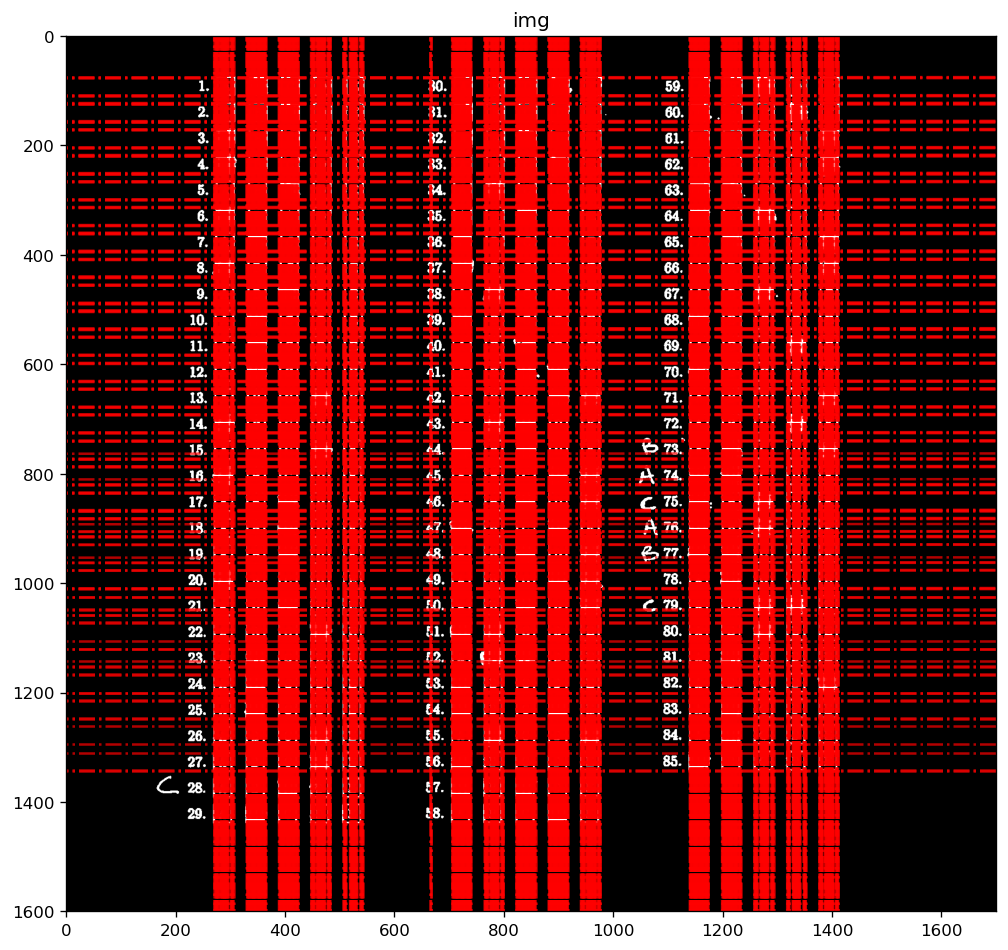

In [44]:
show_lines(threshinv, lines)

In [58]:
VERTICAL_SLOPE_TOL = 15
RHO_MERGE_TOL = 10

abs_lines = np.array(lines)
sorted_lines = abs_lines[np.argsort(abs_lines[:, 0])]
vertical_lines = sorted_lines[slope_close_to(sorted_lines[:, 1], 0, tol=VERTICAL_SLOPE_TOL)]
vertical_lines_merged = vertical_lines[merge_lines(vertical_lines, min_gap=RHO_MERGE_TOL)]
abs_lines.shape, vertical_lines.shape, vertical_lines_merged.shape

((1746, 2), (1142, 2), (72, 2))

In [59]:
vertical_lines_merged

array([[-1411.        ,     3.14159265],
       [-1376.        ,     3.14159265],
       [-1352.        ,     3.14159265],
       [-1317.        ,     3.14159265],
       [-1293.        ,     3.14159265],
       [-1258.        ,     3.14159265],
       [-1234.        ,     3.14159265],
       [-1199.        ,     3.14159265],
       [-1175.        ,     3.14159265],
       [-1139.        ,     3.14159265],
       [-1117.        ,     3.14159265],
       [-1097.        ,     3.14159265],
       [ -976.        ,     3.14159265],
       [ -941.        ,     3.14159265],
       [ -918.        ,     3.14159265],
       [ -882.        ,     3.14159265],
       [ -859.        ,     3.14159265],
       [ -823.        ,     3.14159265],
       [ -800.        ,     3.14159265],
       [ -764.        ,     3.14159265],
       [ -741.        ,     3.14159265],
       [ -705.        ,     3.14159265],
       [ -683.        ,     3.14159265],
       [ -664.        ,     3.14159265],
       [ -542.  

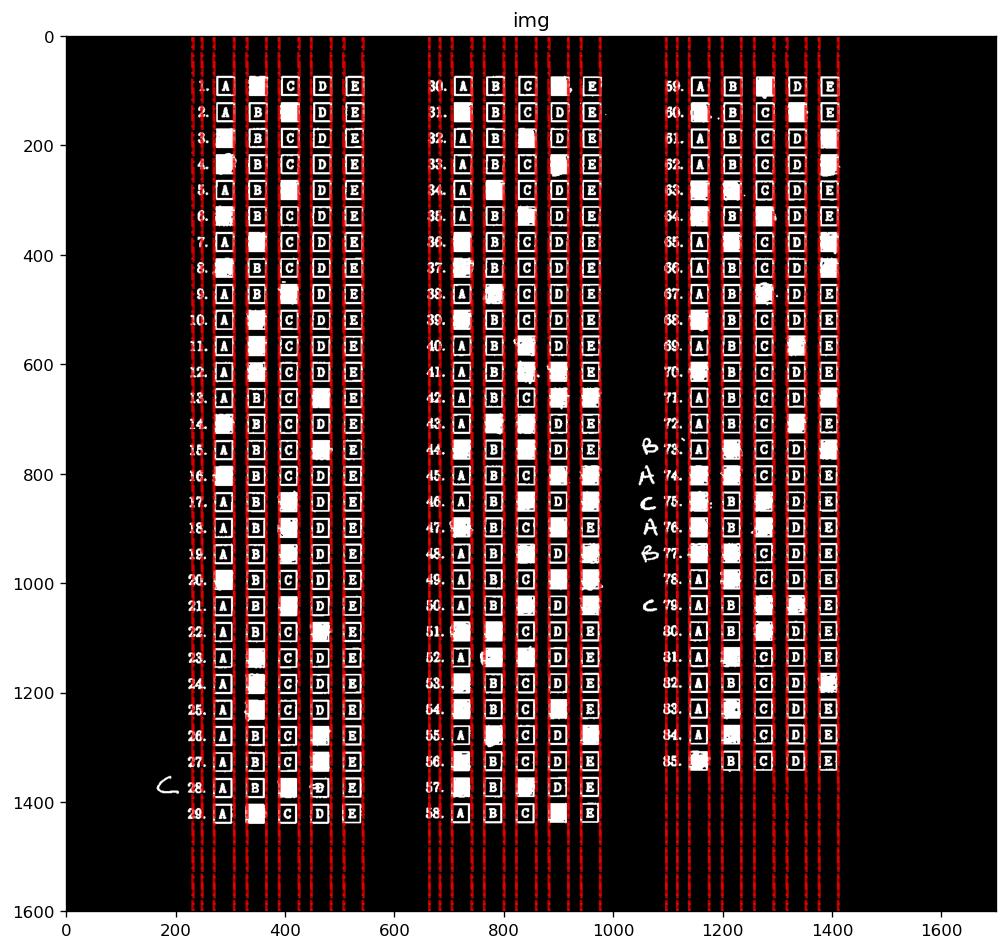

In [60]:
show_lines(threshinv, vertical_lines_merged)